### Загрузка необходимых библиотек

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from mlxtend.plotting import plot_confusion_matrix
from plotly.offline import plot, iplot, init_notebook_mode
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objs as gobj

init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")
from plotly.tools import FigureFactory as ff

%matplotlib inline

In [23]:
data = pd.read_csv('.././data/heart_failure_clinical_records_dataset.csv')

In [35]:
labels = ['Dead', 'Alive']
values = [len(data[data['DEATH_EVENT'] == 1]), len(data[data['DEATH_EVENT'] == 0])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text = 'Value counts of males vs females')
fig.show()

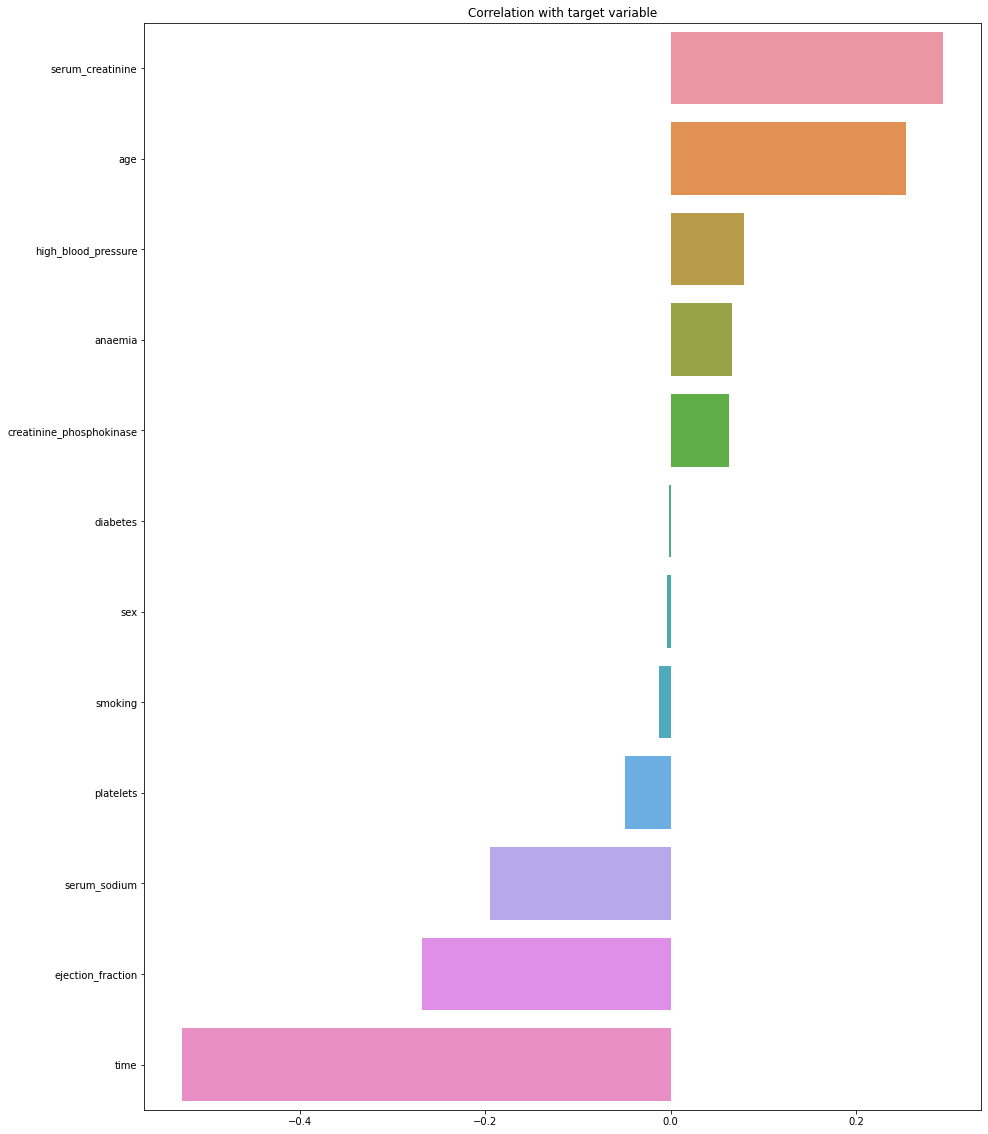

In [36]:
TARGET_NAME = 'DEATH_EVENT'

corr_with_target = data.corr()[TARGET_NAME].sort_values(ascending=False)[1:]
plt.figure(figsize=(15, 20))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index)
plt.title('Correlation with target variable')
plt.show()

In [33]:
h_data = [data["age"].values]
age_group = ['age'] 

fig = ff.create_distplot(h_data, age_group)
fig.update_layout(title_text='Age Group')

fig.show()

In [25]:
age = data['age']
death = data['DEATH_EVENT']

Text(0, 0.5, 'Count')

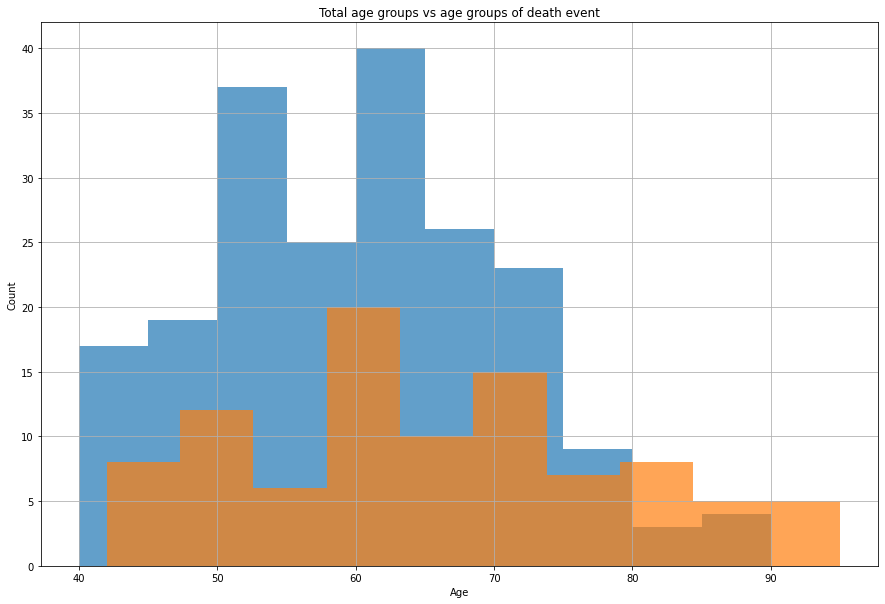

In [26]:
data.groupby(death).age.hist(figsize = (15,10), alpha=0.7)

plt.title('Total age groups vs age groups of death event')
plt.xlabel('Age')
plt.ylabel('Count')

In [27]:
labels = ['Total females', 'Total males']
values = [len(data[data['sex'] == 0]), len(data[data['sex'] == 1])]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text = 'Value counts of males vs females')
fig.show()

In [11]:
female = data[data['sex'] == 0]
male = data[data['sex'] == 1]

In [12]:
labels = ['Male survivors', 'Dead males', 'Female survivors', 'Dead females']
values = [(male['DEATH_EVENT'] == 0).sum(), (male['DEATH_EVENT'] == 1).sum(), (female['DEATH_EVENT'] == 0).sum(), (female['DEATH_EVENT'] == 1).sum()]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text = 'Value counts of genders that survived and died')
fig.show()

In [13]:
labels = ['Male without HBP', 'Males with HBP', 'Female without HBP', 'Females with HBP']
values = [(male['high_blood_pressure'] == 0).sum(), (male['high_blood_pressure'] == 1).sum(), (female['high_blood_pressure'] == 0).sum(), (female['high_blood_pressure'] == 1).sum()]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text = 'Value counts of genders with and without high blood pressure')
fig.show()

In [14]:
fig = px.histogram(data, x = 'creatinine_phosphokinase', color = 'DEATH_EVENT')
fig.show()

In [15]:
fig = px.histogram(data, x = 'ejection_fraction', color = 'DEATH_EVENT')
fig.show()

In [16]:
fig = px.histogram(data, x = 'platelets', color = 'DEATH_EVENT')
fig.show()

In [17]:
fig = px.histogram(data, x = 'serum_creatinine', color = 'DEATH_EVENT')
fig.show()

In [18]:
fig = px.histogram(data, x = 'serum_sodium', color = 'DEATH_EVENT')
fig.show()

In [19]:
labels = ['Male without diabetes', 'Males with diabetes', 'Female without diabetes', 'Females with diabetes']
values = [(male['diabetes'] == 0).sum(), (male['diabetes'] == 1).sum(), (female['diabetes'] == 0).sum(), (female['diabetes'] == 1).sum()]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text = 'Value counts of diabetic genders')
fig.show()

In [20]:
labels = ['Male without anaemia', 'Males with anaemia', 'Female without anaemia', 'Females with anaemia']
values = [(male['anaemia'] == 0).sum(), (male['anaemia'] == 1).sum(), (female['anaemia'] == 0).sum(), (female['anaemia'] == 1).sum()]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text = 'Value counts of genders with anaemia')
fig.show()

In [21]:
labels = ['Male non-smokers', 'Male smokers', 'Female non-smokers', 'Female smokers']
values = [(male['smoking'] == 0).sum(), (male['smoking'] == 1).sum(), (female['smoking'] == 0).sum(), (female['smoking'] == 1).sum()]
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4)])
fig.update_layout(title_text = 'Value counts of smokers')
fig.show()

In [28]:
hbp = data['high_blood_pressure'] == 1
fig = px.histogram(data, x = hbp, color = 'DEATH_EVENT')
fig.show()

In [29]:
dia = data['diabetes'] == 1
fig = px.histogram(data, x = dia, color = 'DEATH_EVENT')
fig.show()

In [30]:
ana = data['anaemia'] == 1
fig = px.histogram(data, x = ana, color = 'DEATH_EVENT')
fig.show()

In [31]:
smk = data['smoking'] == 1
fig = px.histogram(data, x = smk, color = 'DEATH_EVENT')
fig.show()

<AxesSubplot:>

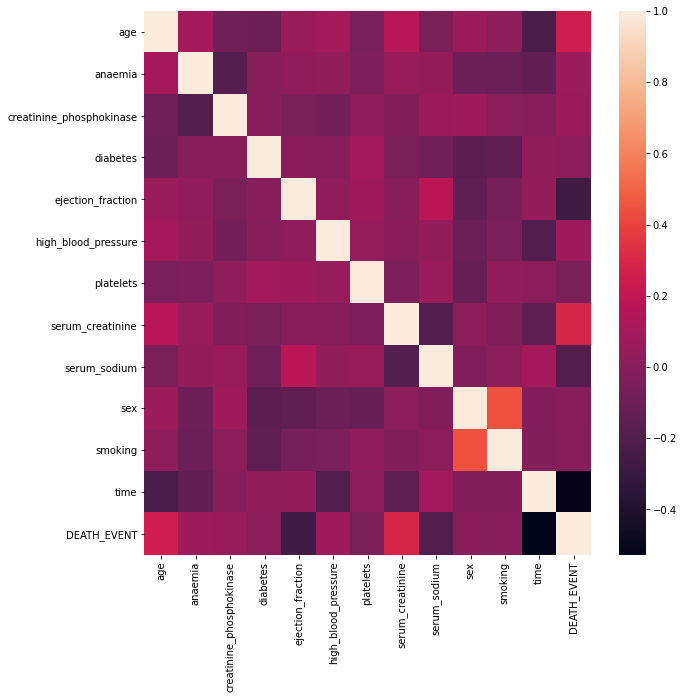

In [32]:
plt.figure(figsize = (10, 10))
sns.heatmap(data.corr())